# AT1 Example II: Regression problem
Load the dataset from Google Drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/IntroAILab/AT2

/content/drive/MyDrive/IntroAILab/AT2


The following is the library used for the experiment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn import metrics
from tensorflow.keras.layers import Dense, Input
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

### Finding a dataset

A dataset about attacks against IoT devices is found in https://archive.ics.uci.edu/dataset/942/rt-iot2022.

Here is a description of each column from the **RT-IoT2022 dataset**
1. **id.orig_p**: The source port number.
2. **id.resp_p**: The destination port number.
3. **proto**: The network protocol used during the attack.
4. **service**: The type of network service being accessed.
5. **flow_duration**: The total time duration of the flow.
6. **fwd_pkts_tot**: Total number of packets sent from the source during the session.
7. **bwd_pkts_tot**: Total number of packets sent from the destination during the session.
8. **fwd_data_pkts_tot**: The total number of data packets sent from the source.
9. **bwd_data_pkts_tot**: The total number of data packets sent from the destination.
10. **fwd_pkts_per_sec**: The rate of packets sent from the source.
11. **bwd_pkts_per_sec**: The rate of packets sent from the destination.
12. **flow_pkts_per_sec**: The total rate of packets in the session.
13. **down_up_ratio**: The ratio of the total number of packets in the forward direction to those in the backward direction, indicating data flow asymmetry.
14. **fwd_header_size_tot**: The total size of packet headers sent from the source.
15. **fwd_header_size_min**: The minimum size of packet headers sent from the source.
16. **fwd_header_size_max**: The maximum size of packet headers sent from the source.
17. **bwd_header_size_tot**: The total size of packet headers sent from the destination.
18. **bwd_header_size_min**: The minimum size of packet headers sent from the destination.
19. **bwd_header_size_max**: The maximum size of packet headers sent from the destination.
20. **flow_FIN_flag_count**: The total number of FIN flags.
21. **flow_SYN_flag_count**: The total number of SYN flags.
22. **flow_RST_flag_count**: The total number of RST flags.
23. **fwd_PSH_flag_count**: The number of PSH flags in the forward direction.
24. **bwd_PSH_flag_count**: The number of PSH flags in the backward direction.
25. **flow_ACK_flag_count**: The total number of ACK flags.
26. **fwd_URG_flag_count**: The number of URG flags in the forward direction.
27. **bwd_URG_flag_count**: The number of URG flags in the backward direction.
28. **flow_CWR_flag_count**: The total number of CWR flags.
29. **flow_ECE_flag_count**: The total number of ECE flags.
30. **fwd_pkts_payload.min**: The minimum size of payload data in packets sent from the source.
31. **fwd_pkts_payload.max**: The maximum size of payload data in packets sent from the source.
32. **fwd_pkts_payload.tot**: The total payload data size sent from the source.
33. **fwd_pkts_payload.avg**: The average payload size per packet sent from the source.
34. **fwd_pkts_payload.std**: The standard deviation of the payload size in packets sent from the source.
35. **bwd_pkts_payload.min**: The minimum size of payload data in packets sent from the destination.
36. **bwd_pkts_payload.max**: The maximum size of payload data in packets sent from the destination.
37. **bwd_pkts_payload.tot**: The total payload size sent from the destination.
38. **bwd_pkts_payload.avg**: The average payload size per packet sent from the destination.
39. **bwd_pkts_payload.std**: The standard deviation of the payload size in packets sent from the destination.
40. **flow_pkts_payload.min**: The minimum payload size for all packets in the flow.
41. **flow_pkts_payload.max**: The maximum payload size for all packets in the flow.
42. **flow_pkts_payload.tot**: The total payload size for all packets in the flow.
43. **flow_pkts_payload.avg**: The average payload size per packet in the flow.
44. **flow_pkts_payload.std**: The standard deviation of payload sizes in the flow.
45. **fwd_iat.min**: The minimum IAT between packets sent from the source.
46. **fwd_iat.max**: The maximum inter-arrival time between packets from the source.
47. **fwd_iat.tot**: The total inter-arrival time for packets from the source.
48. **fwd_iat.avg**: The average inter-arrival time between packets from the source.
49. **fwd_iat.std**: The standard deviation of inter-arrival times between packets from the source.
50. **bwd_iat.min**: The minimum inter-arrival time between packets from the destination.
51. **bwd_iat.max**: The maximum inter-arrival time between packets from the destination.
52. **bwd_iat.tot**: The total inter-arrival time for packets from the destination.
53. **bwd_iat.avg**: The average inter-arrival time between packets from the destination.
54. **bwd_iat.std**: The standard deviation of inter-arrival times between packets from the destination.
55. **flow_iat.min**: The minimum inter-arrival time between packets in the entire flow.
56. **flow_iat.max**: The maximum inter-arrival time in the flow.
57. **flow_iat.tot**: The total inter-arrival time for all packets in the flow.
58. **flow_iat.avg**: The average inter-arrival time for all packets in the flow.
59. **flow_iat.std**: The standard deviation of inter-arrival times in the flow.
60. **payload_bytes_per_second**: The rate of data transfer (payload) over the flow.
61. **fwd_subflow_pkts**: The number of packets in the forward direction in the current subflow.
62. **bwd_subflow_pkts**: The number of packets in the backward direction in the current subflow.
63. **fwd_subflow_bytes**: The number of bytes in the forward direction in the current subflow.
64. **bwd_subflow_bytes**: The number of bytes in the backward direction in the current subflow.
65. **fwd_bulk_bytes**: The total bulk bytes sent from the source during the flow.
66. **bwd_bulk_bytes**: The total bulk bytes sent from the destination during the flow.
67. **fwd_bulk_packets**: The number of bulk packets sent from the source.
68. **bwd_bulk_packets**: The number of bulk packets sent from the destination.
69. **fwd_bulk_rate**: The rate of bulk data transfer from the source.
70. **bwd_bulk_rate**: The rate of bulk data transfer from the destination.
71. **active.min**: The minimum active time of a connection in the session.
72. **active.max**: The maximum active time of a connection in the session.
73. **active.tot**: The total active time of the connection in the session.
74. **active.avg**: The average active time of the connection in the session.
75. **active.std**: The standard deviation of active times for the connection in the session.
76. **idle.min**: The minimum idle time for the flow.
77. **idle.max**: The maximum idle time for the flow.
78. **idle.tot**: The total idle time for the flow.
79. **idle.avg**: The average idle time for the flow.
80. **idle.std**: The standard deviation of idle times for the flow.
81. **fwd_init_window_size**: The initial window size in the forward direction.
82. **bwd_init_window_size**: The initial window size in the backward direction.
83. **fwd_last_window_size**: The window size in the forward direction at the end of the flow.
84. **Attack_type**: The type of attack.

In [ ]:
# load dataset from a csv file.
df = pd.read_csv("https://archive.ics.uci.edu/static/public/942/data.csv")
# maximum number of columns displayed.
pd.set_option('display.max_columns', 84)
df.head()

id  id.orig_p  id.resp_p proto service  flow_duration  fwd_pkts_tot  \
0   0      38667       1883   tcp    mqtt      32.011598             9   
1   1      51143       1883   tcp    mqtt      31.883584             9   
2   2      44761       1883   tcp    mqtt      32.124053             9   
3   3      60893       1883   tcp    mqtt      31.961063             9   
4   4      51087       1883   tcp    mqtt      31.902362             9   

   bwd_pkts_tot  fwd_data_pkts_tot  bwd_data_pkts_tot  fwd_pkts_per_sec  \
0             5                  3                  3          0.281148   
1             5                  3                  3          0.282277   
2             5                  3                  3          0.280164   
3             5                  3                  3          0.281593   
4             5                  3                  3          0.282111   

   bwd_pkts_per_sec  flow_pkts_per_sec  down_up_ratio  fwd_header_size_tot  \
0          0.156193           0.437341       0.555556                  296   
1          0.156821           0.439097       0.555556                  296   
2          0.155647           0.435811       0.555556                  296   
3          0.156440           0.438033       0.555556                  296   
4          0.156728           0.438839       0.555556                  296   

   fwd_header_size_min  fwd_header_size_max  bwd_header_size_tot  \
0                   32                   40                  168   
1                   32                   40                  168   
2                   32                   40                  168   
3                   32                   40                  168   
4                   32                   40                  168   

   bwd_header_size_min  bwd_header_size_max  flow_FIN_flag_count  \
0                   32                   40                    0   
1                   32                   40                    0   
2                   32                   40                    0   
3                   32                   40                    0   
4                   32                   40                    0   

   flow_SYN_flag_count  flow_RST_flag_count  fwd_PSH_flag_count  \
0                    2                    1                   3   
1                    2                    1                   3   
2                    2                    1                   3   
3                    2                    1                   3   
4                    2                    1                   3   

   bwd_PSH_flag_count  flow_ACK_flag_count  fwd_URG_flag_count  \
0                   3                   13                   0   
1                   3                   13                   0   
2                   3                   13                   0   
3                   3                   13                   0   
4                   3                   13                   0   

   bwd_URG_flag_count  flow_CWR_flag_count  flow_ECE_flag_count  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   fwd_pkts_payload.min  fwd_pkts_payload.max  fwd_pkts_payload.tot  \
0                     0                    33                    76   
1                     0                    33                    76   
2                     0                    33                    74   
3                     0                    33                    74   
4                     0                    33                    76   

   fwd_pkts_payload.avg  fwd_pkts_payload.std  bwd_pkts_payload.min  \
0              8.444444             13.115936                     0   
1              8.444444             13.115936   

In [ ]:
df.shape

(123117, 85)

### Dataset Analyse
Generate histograms for each numeric column

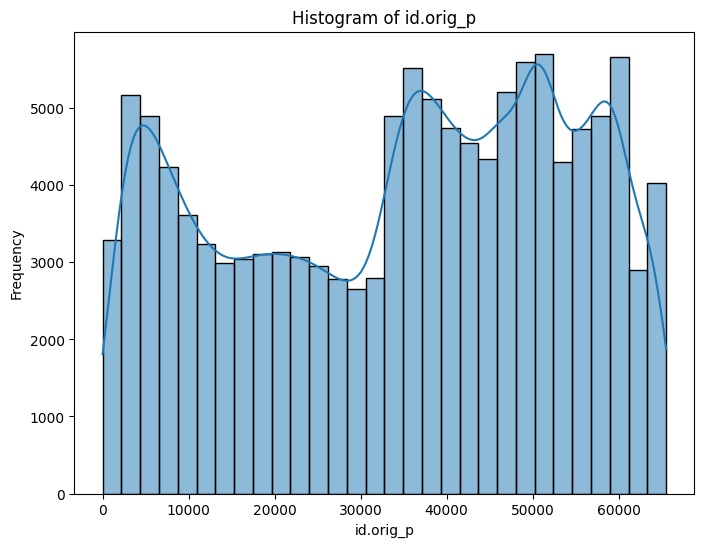

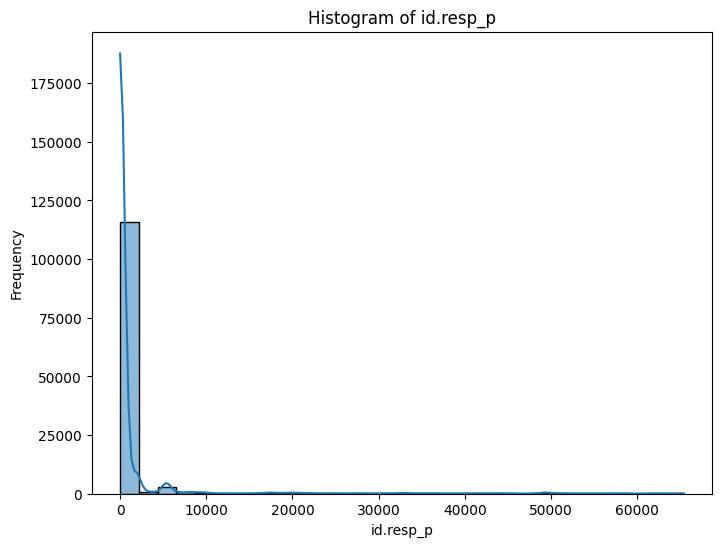

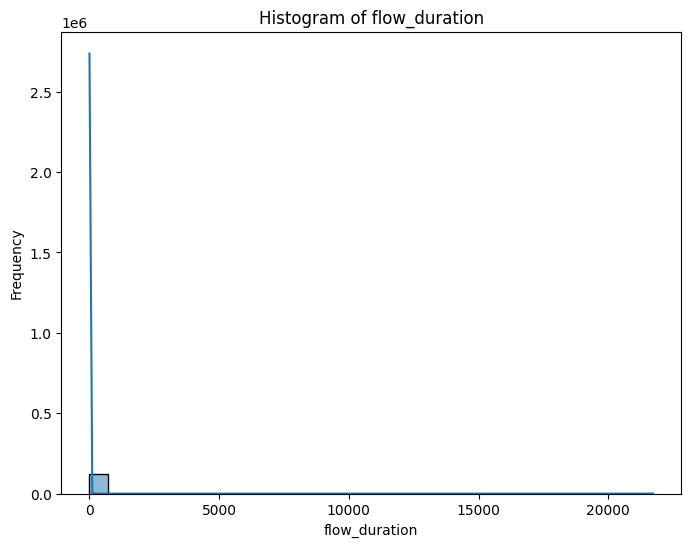

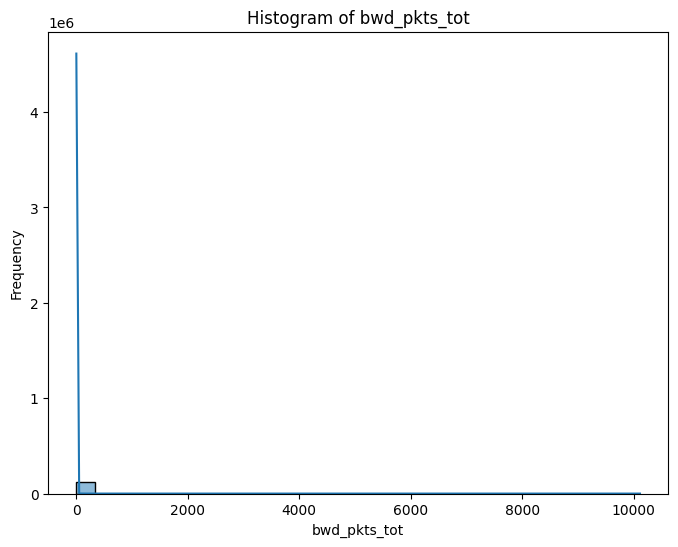

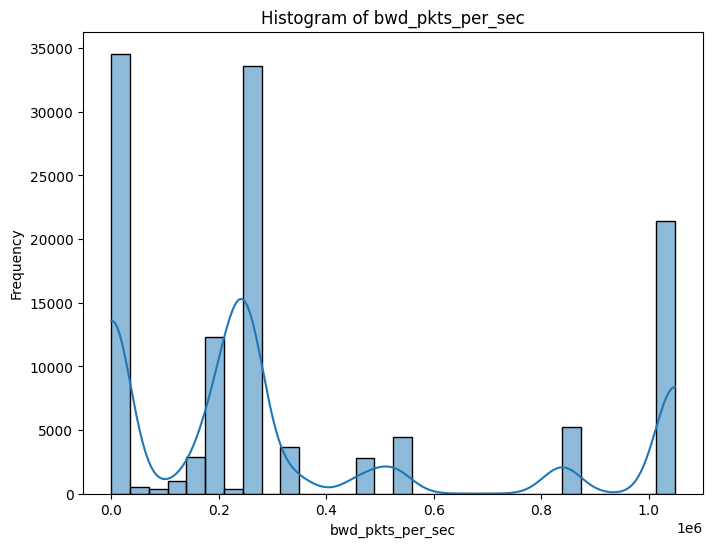

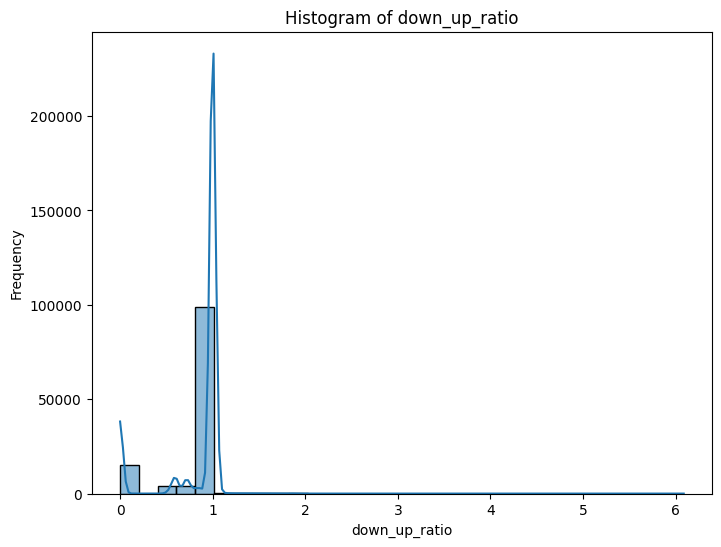

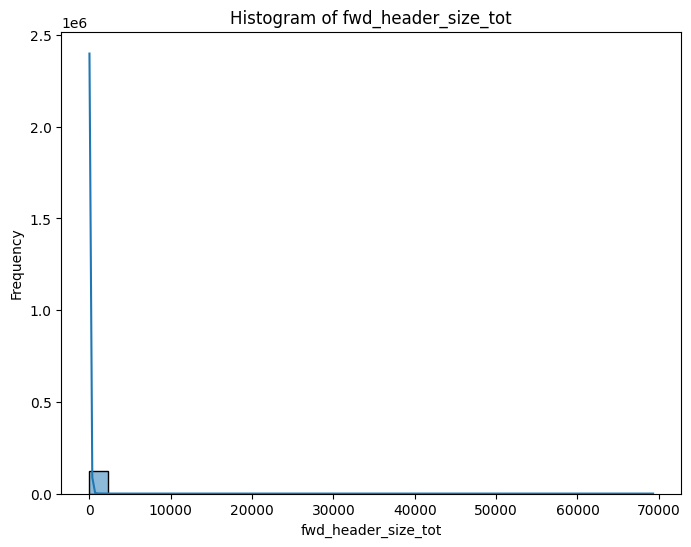

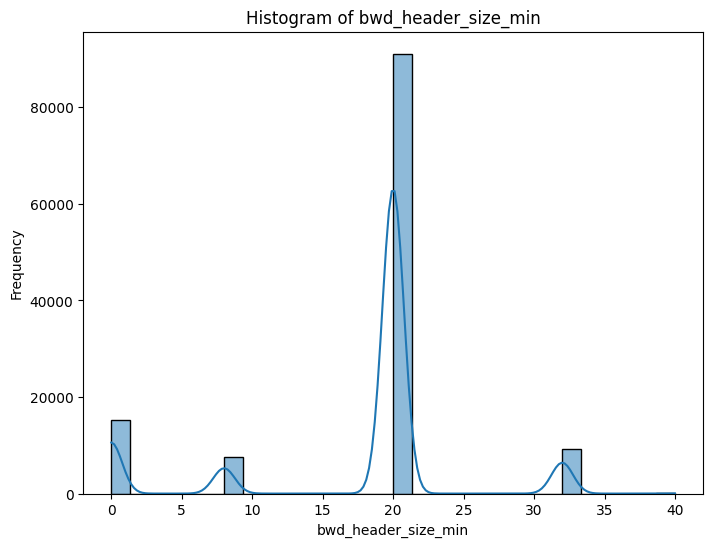

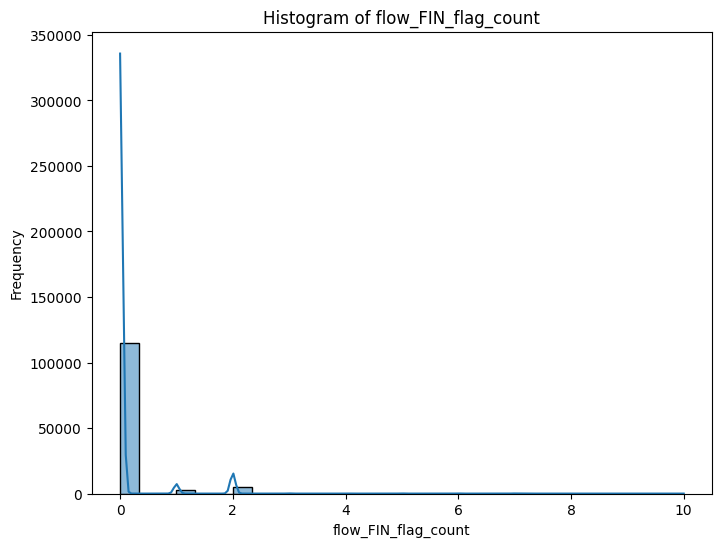

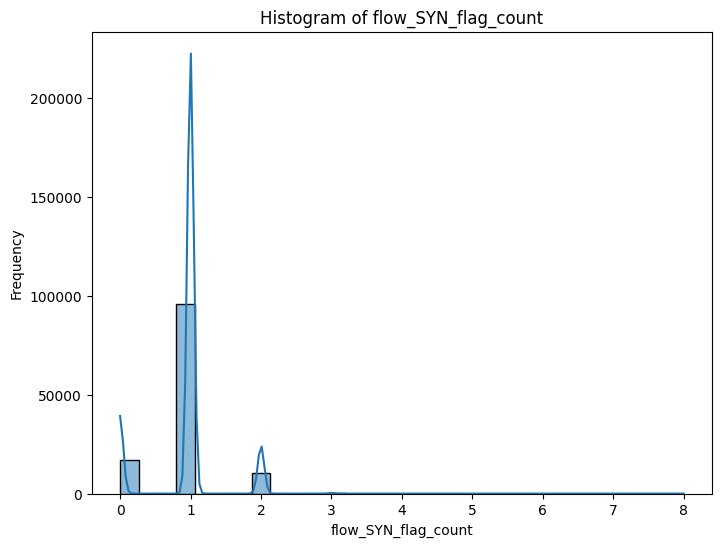

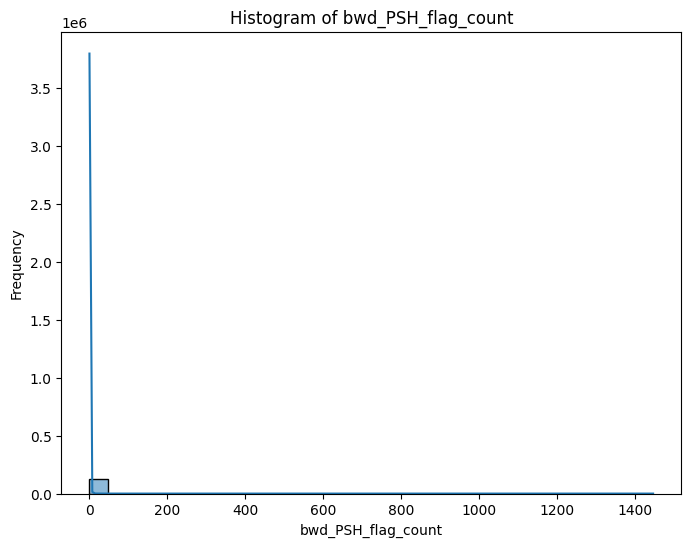

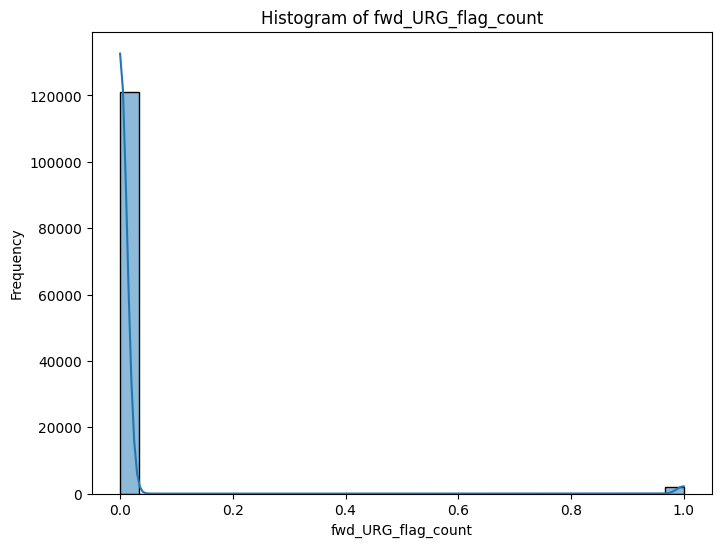

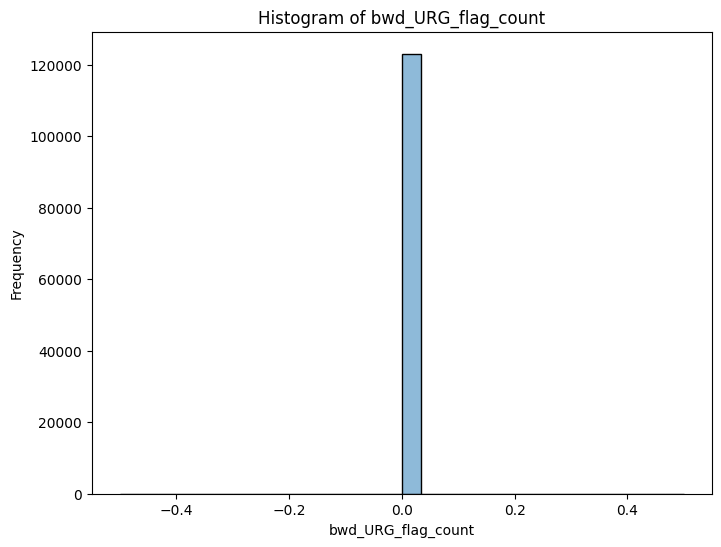

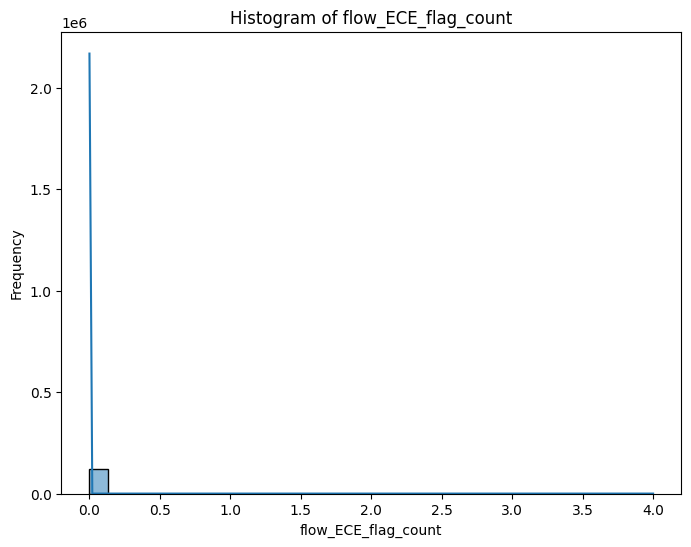

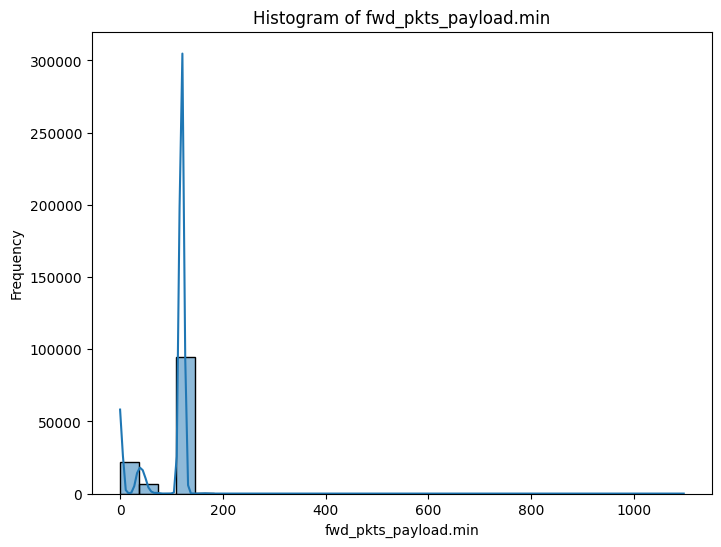

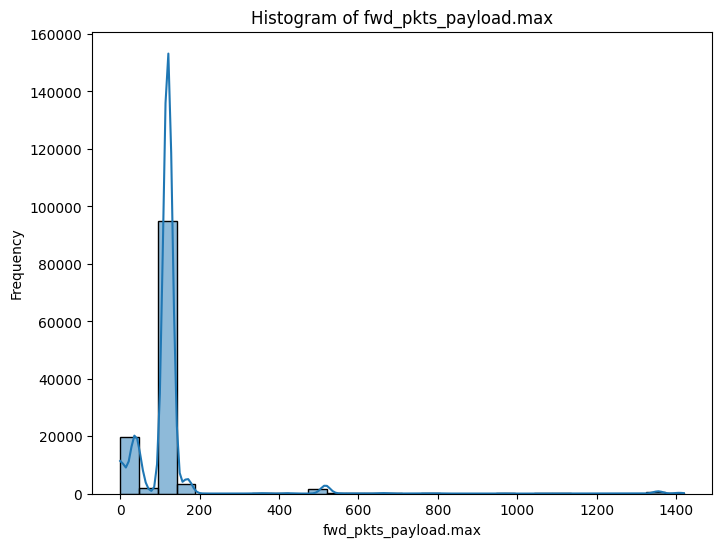

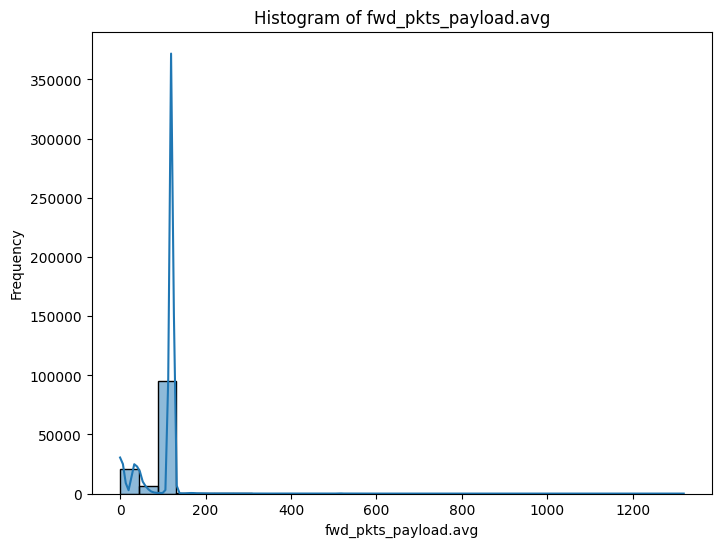

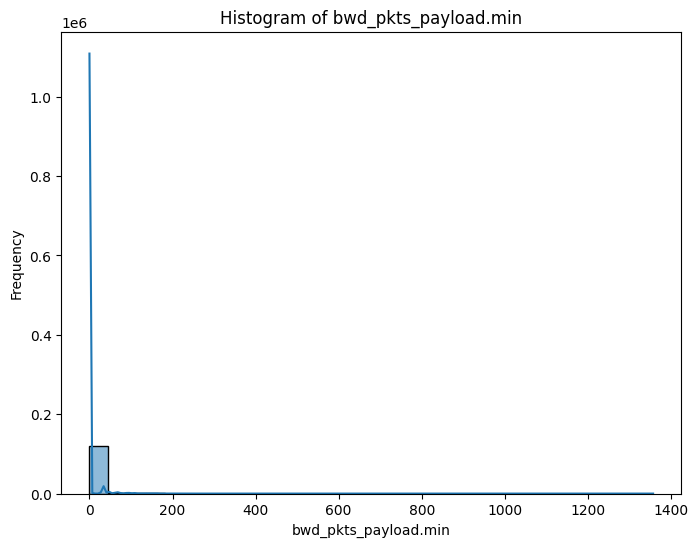

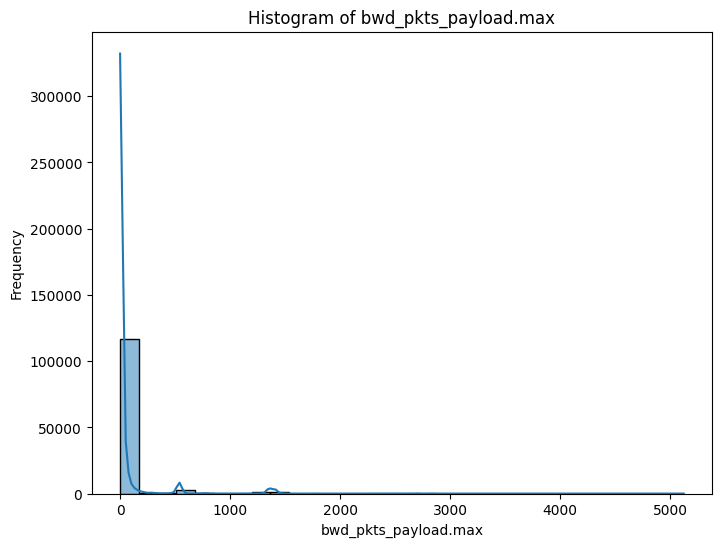

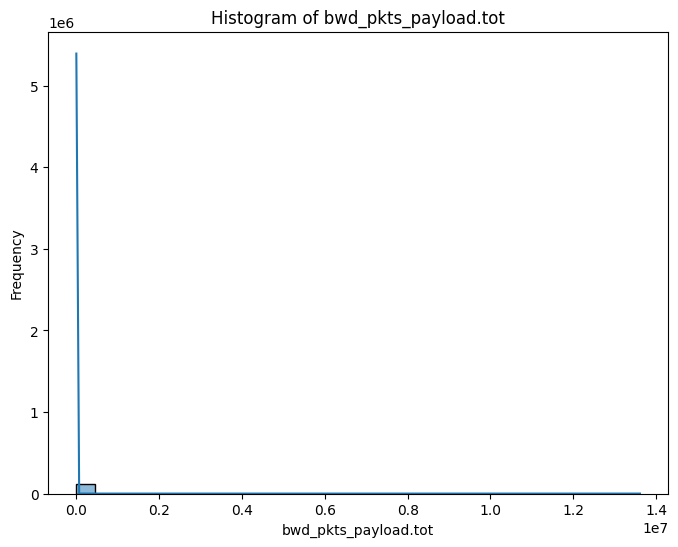

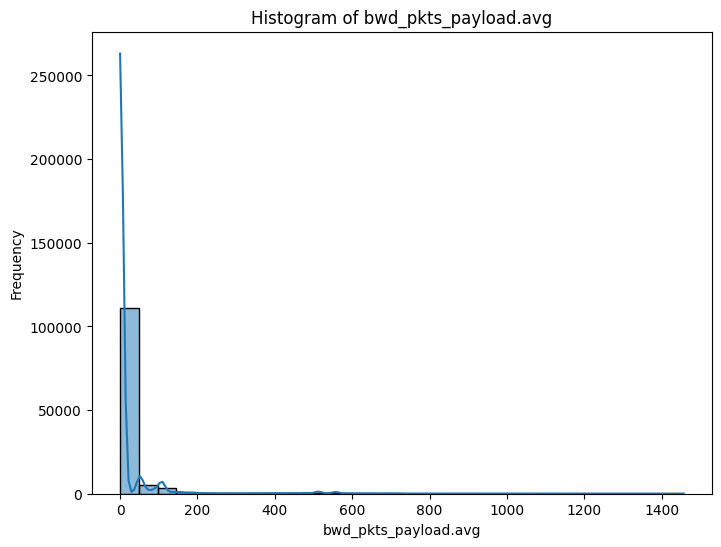

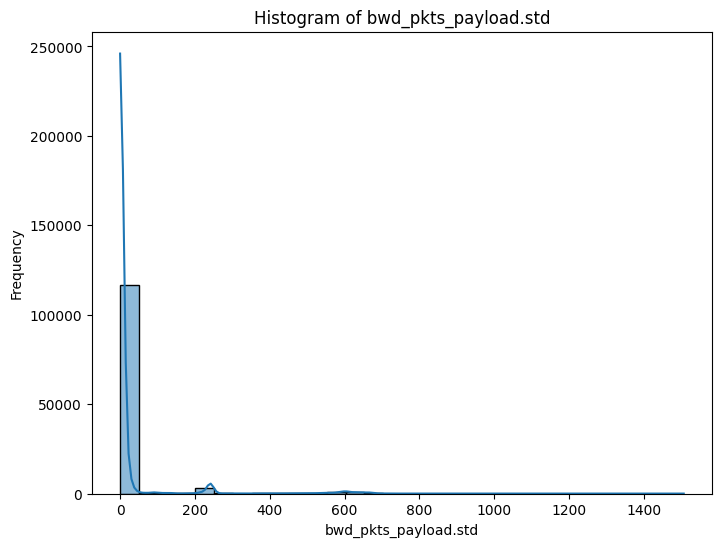

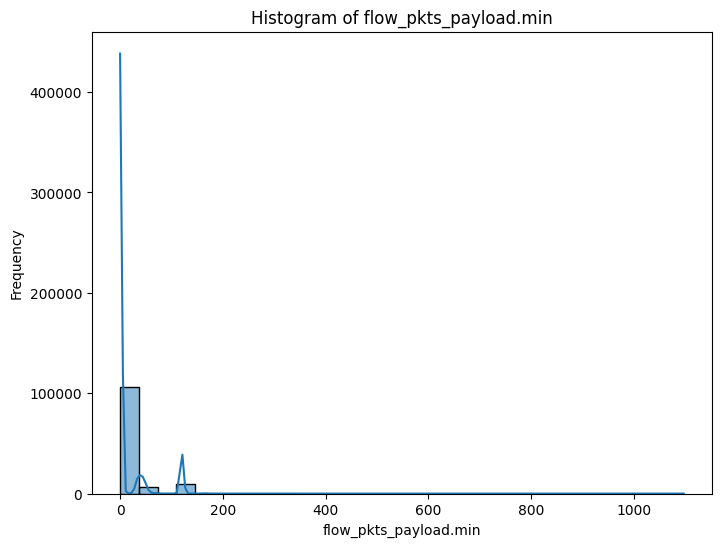

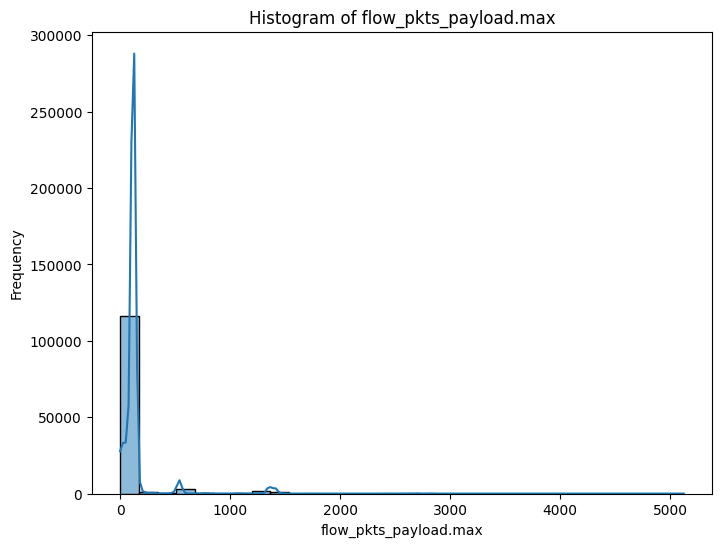

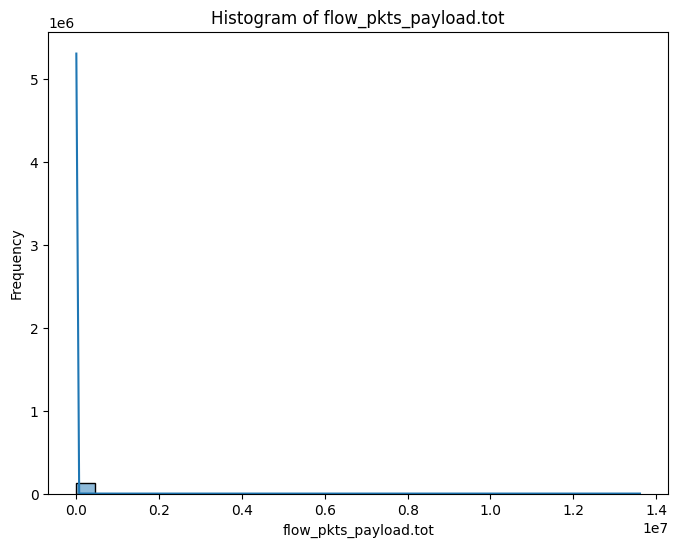

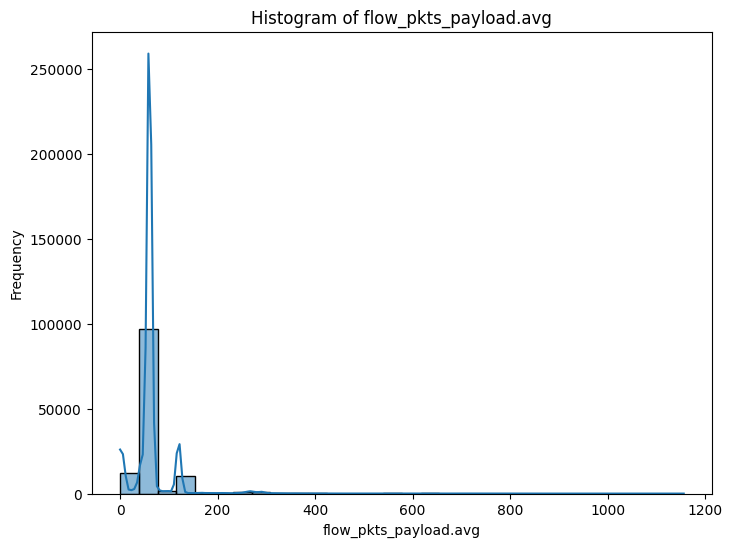

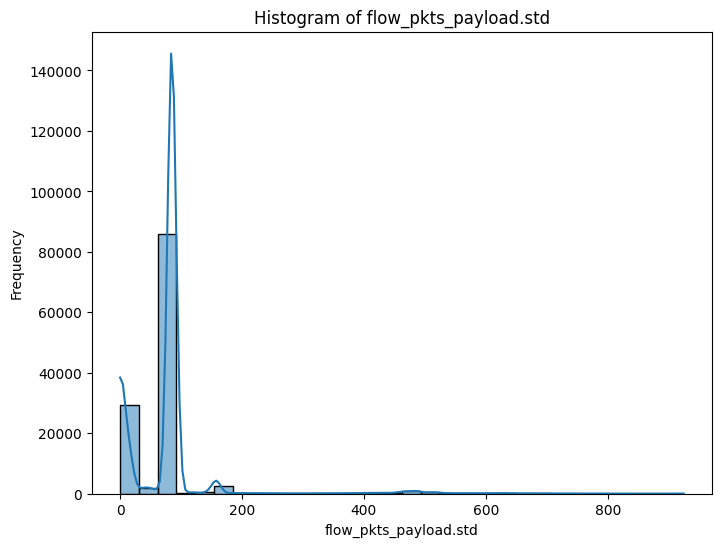

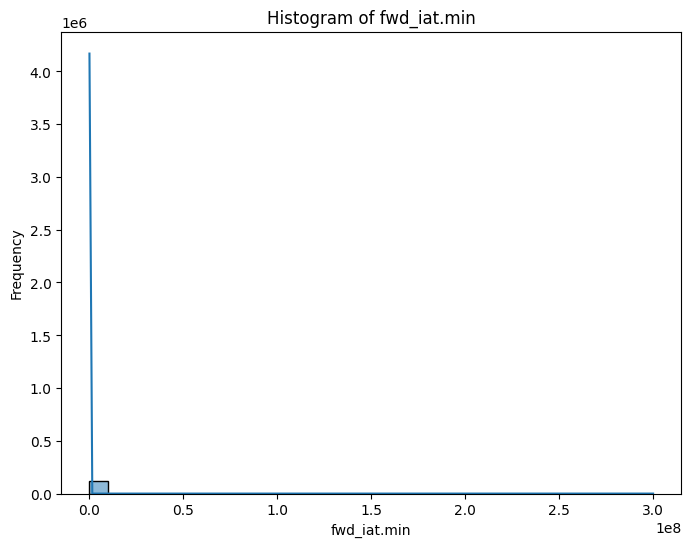

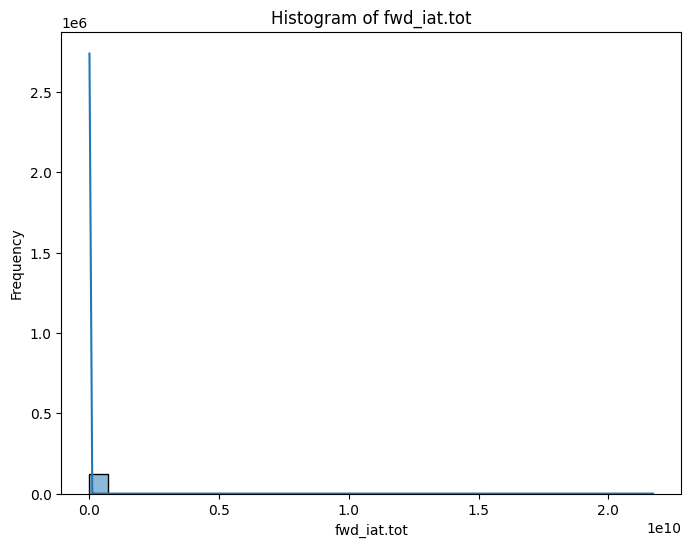

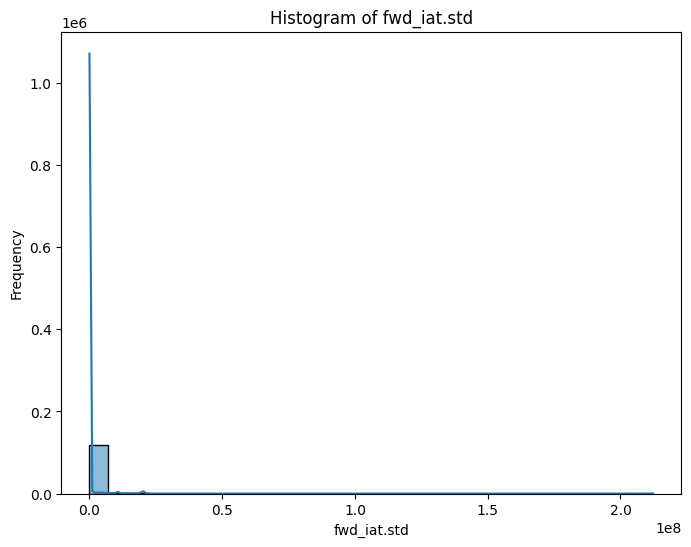

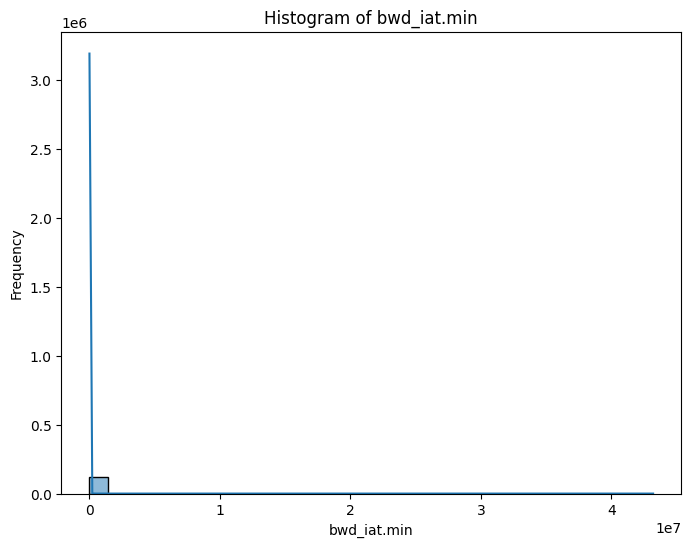

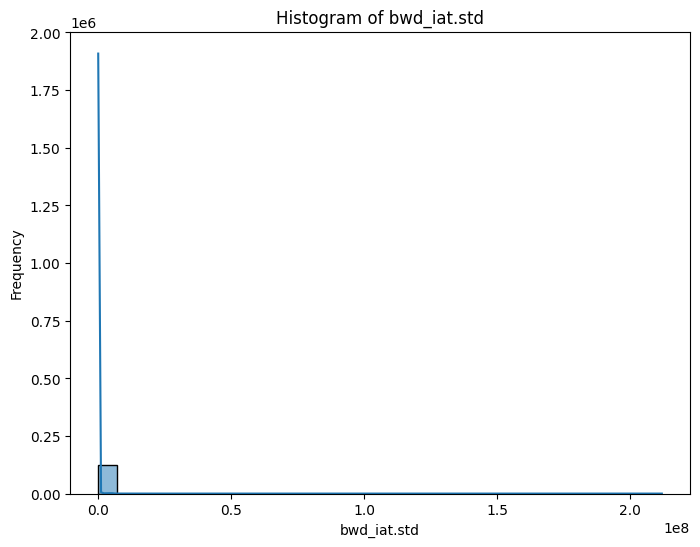

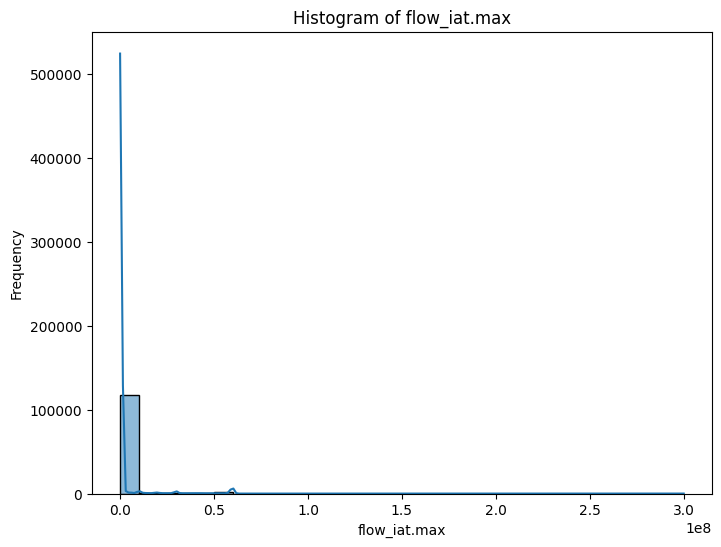

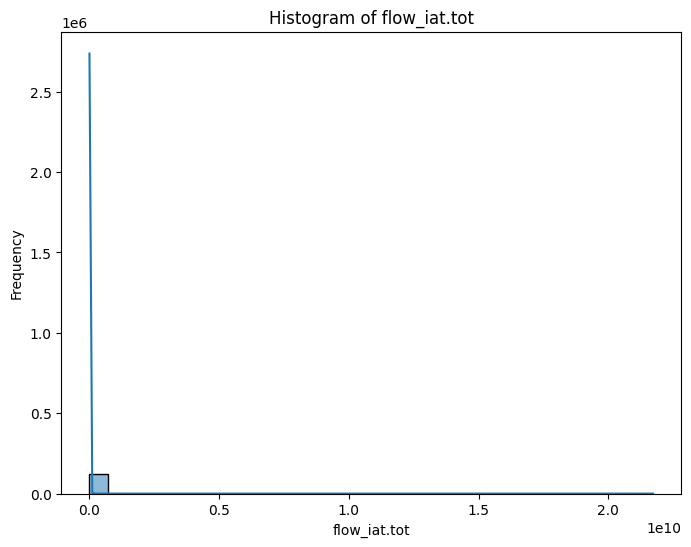

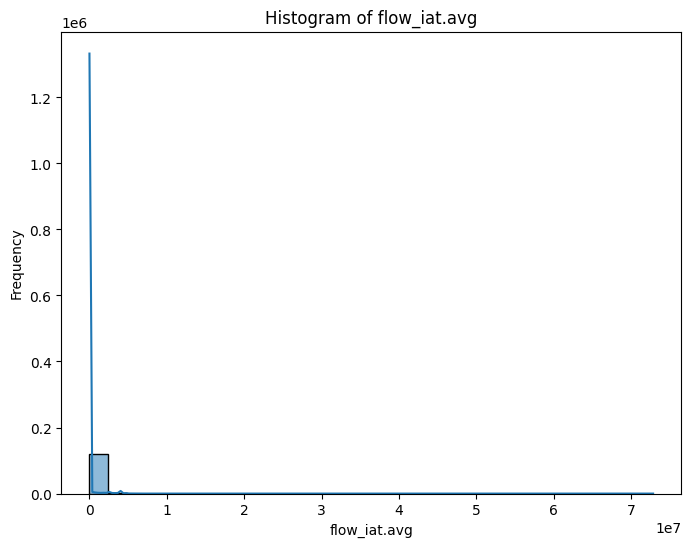

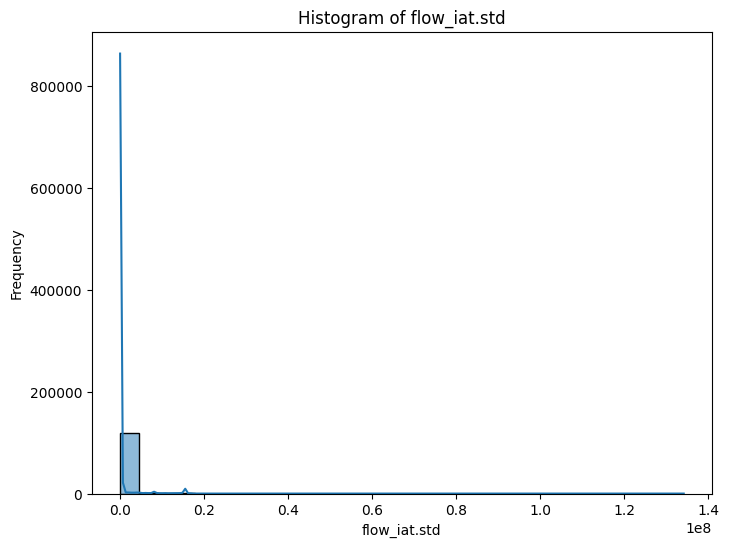

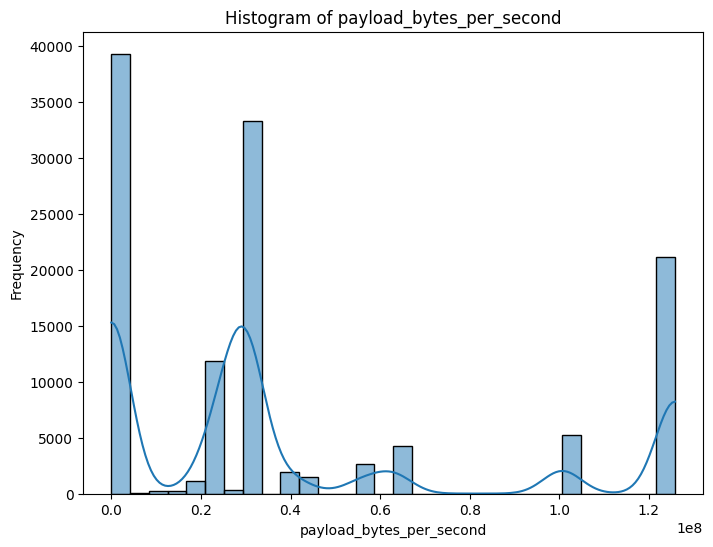

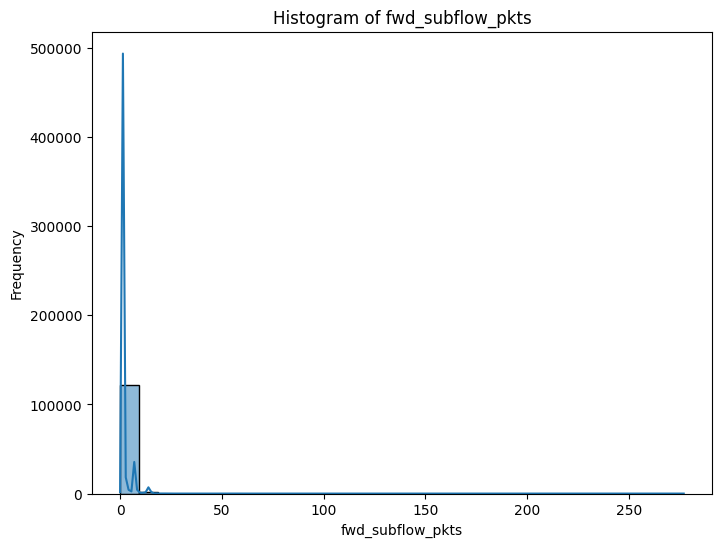

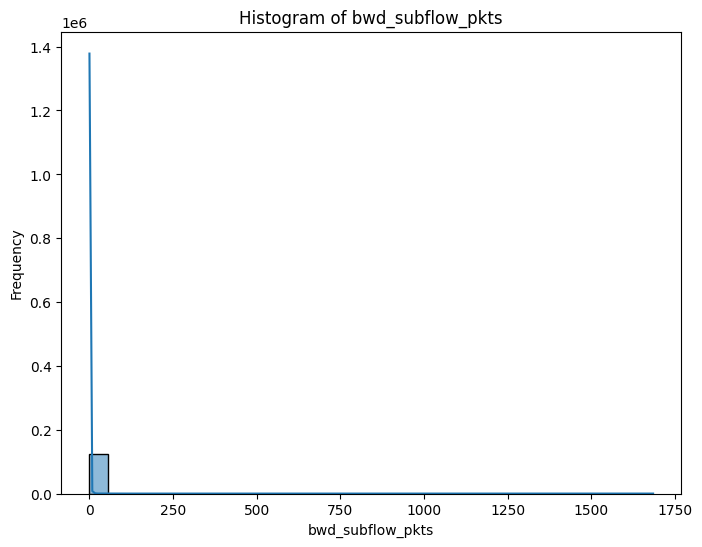

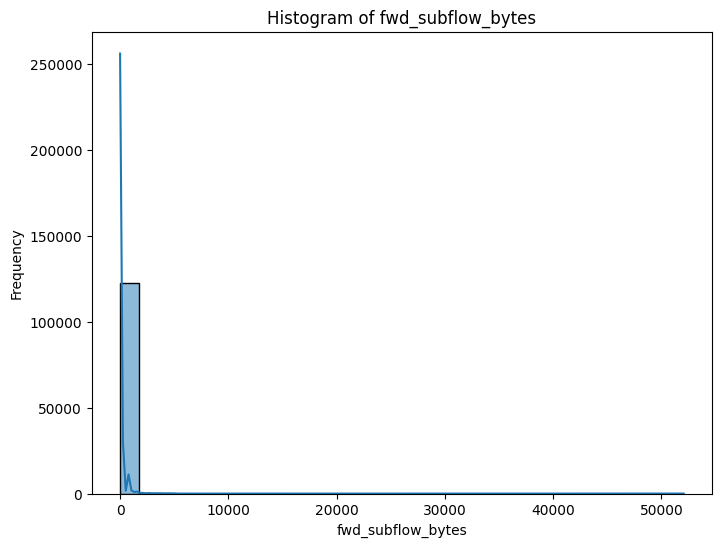

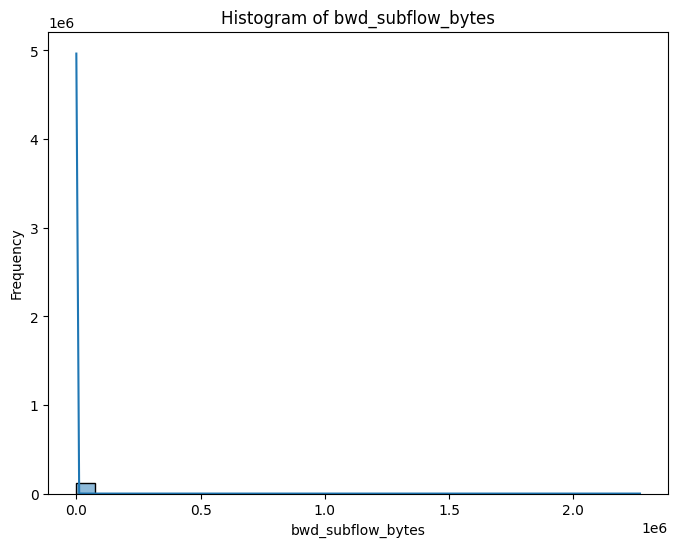

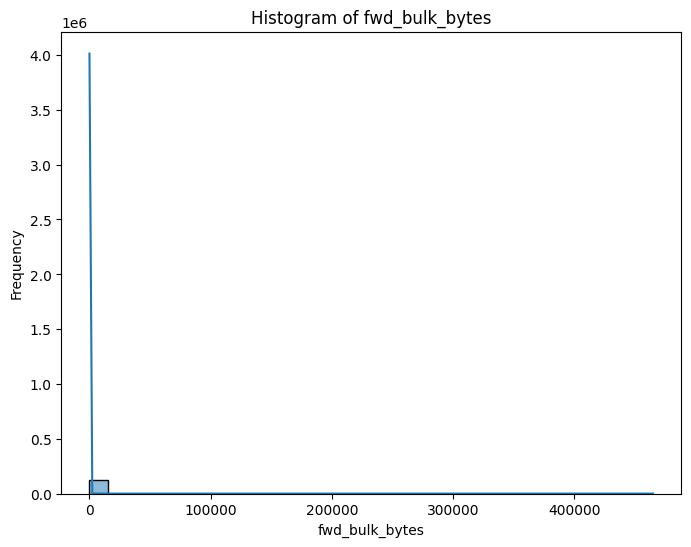

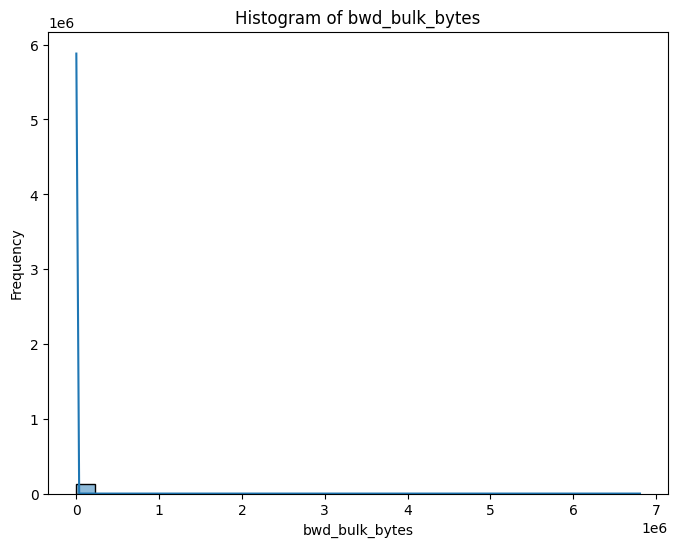

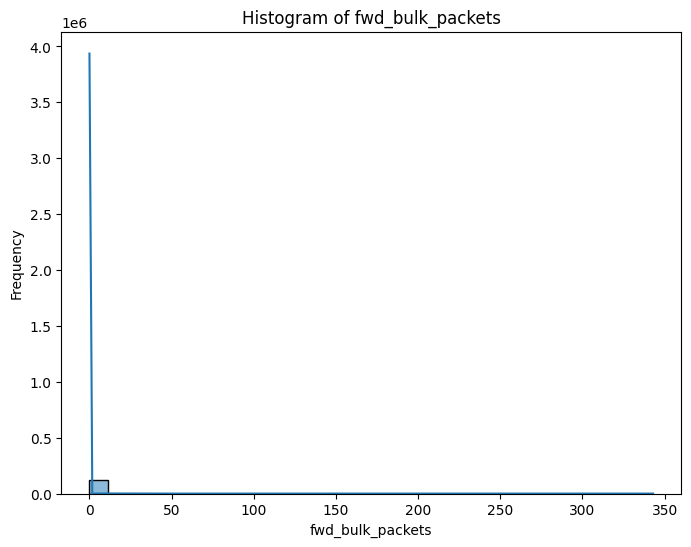

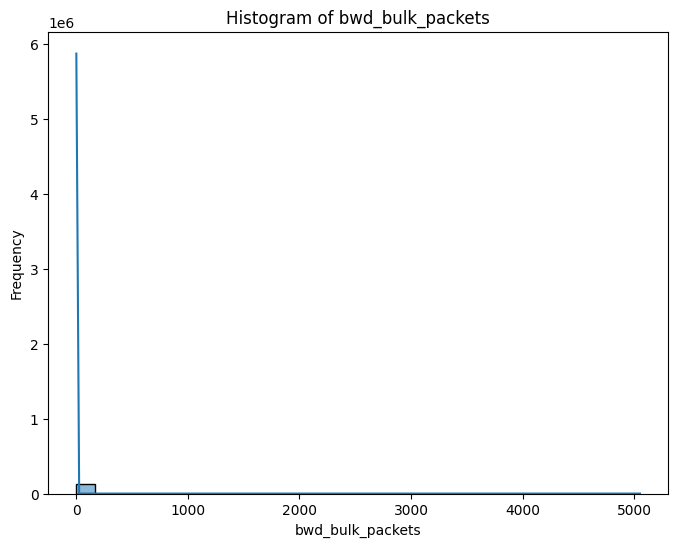

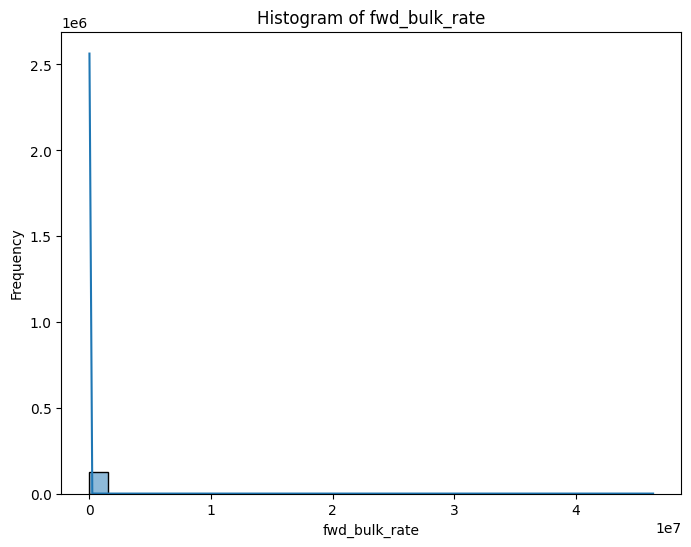

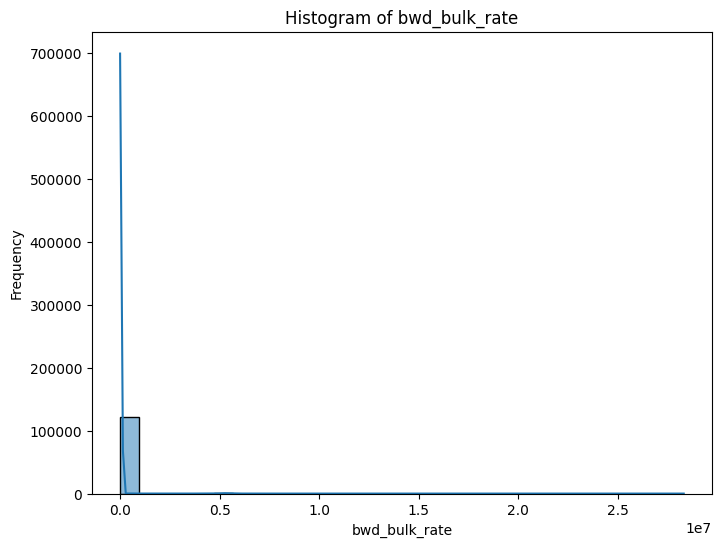

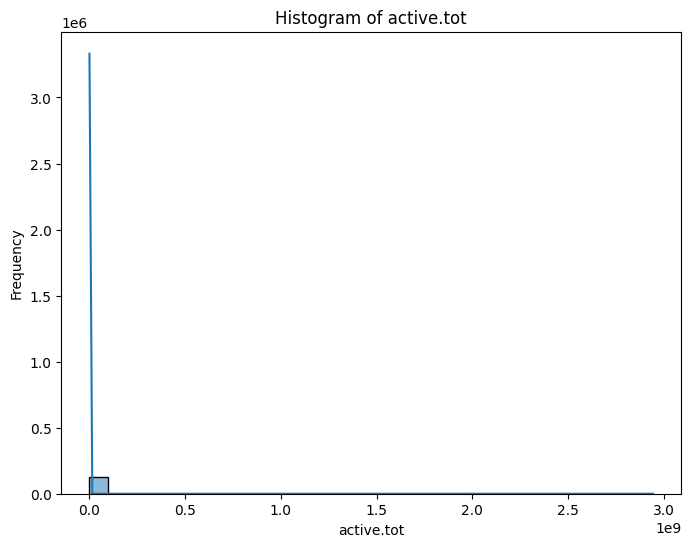

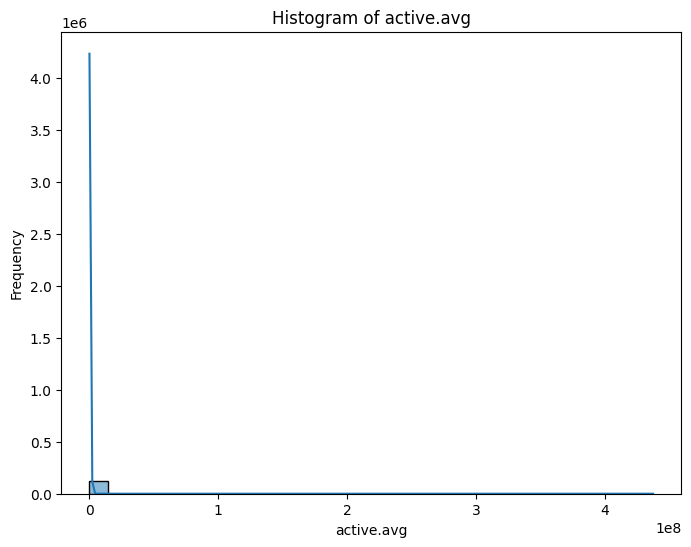

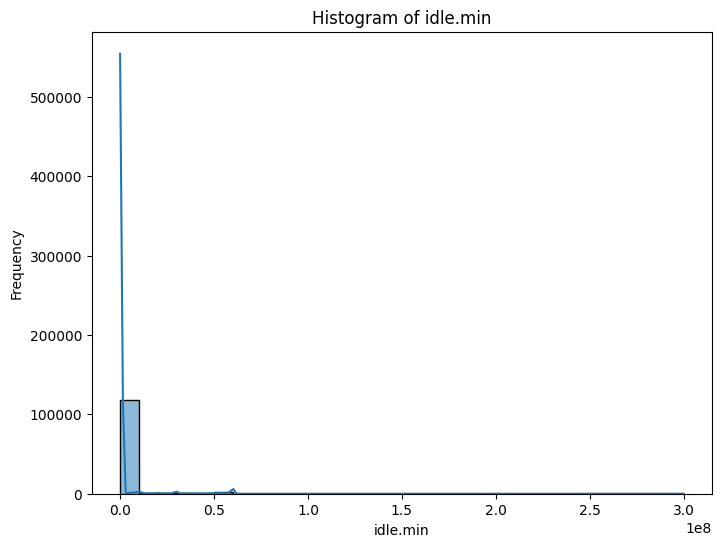

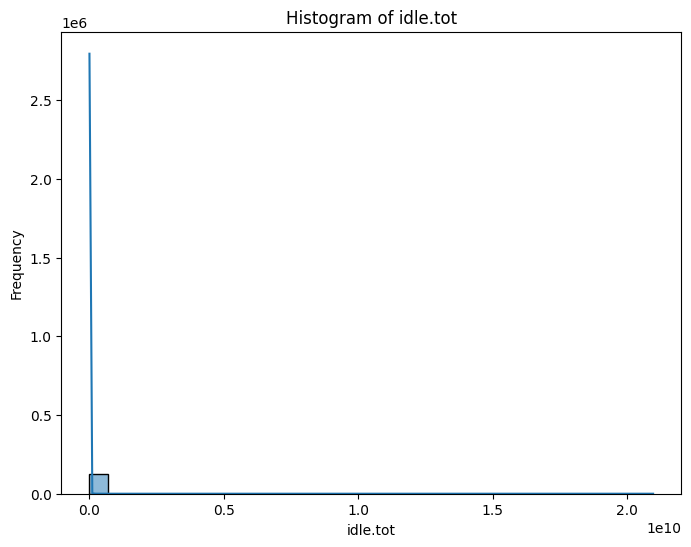

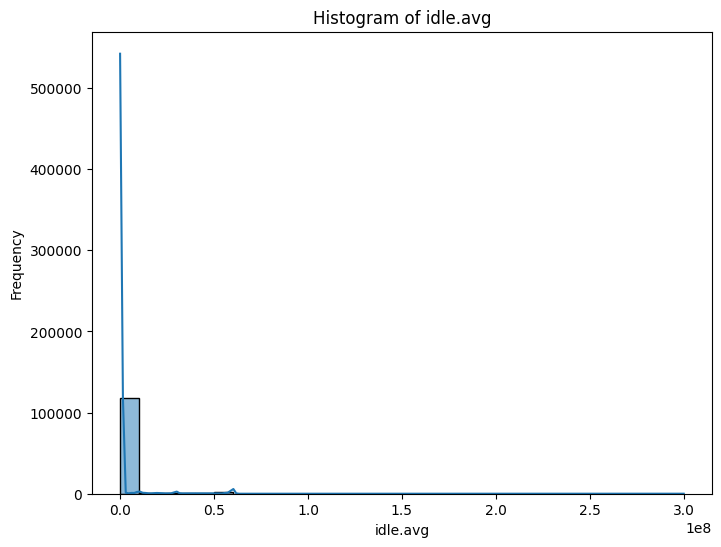

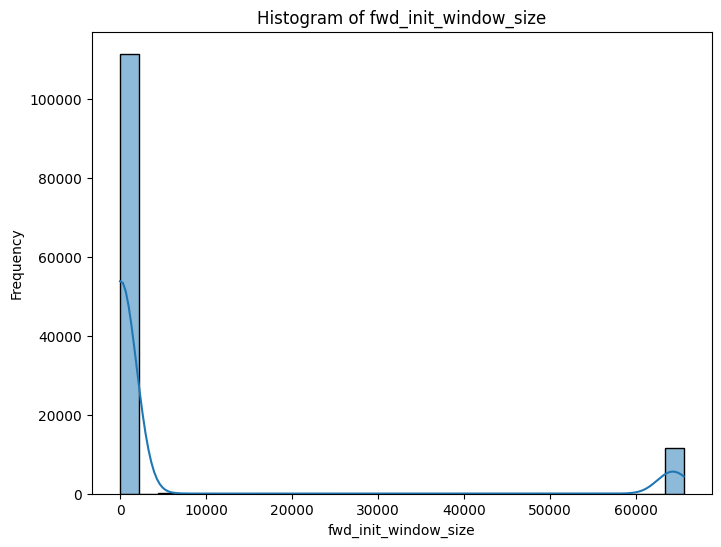

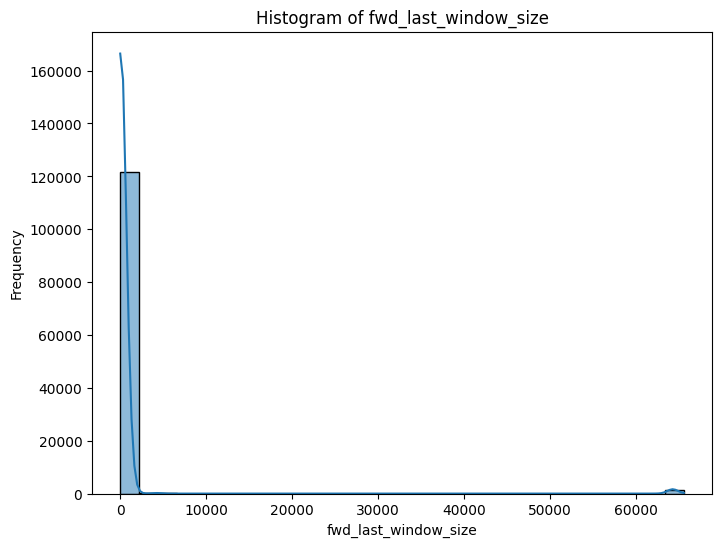

In [ ]:
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    # Set figure size
    plt.figure(figsize=(8, 6))
    # Create histogram with kernel density estimation
    sns.histplot(df[column], bins=30, kde=True)
    # Set the title and label the axes.
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.show()

Encode the categorical label.

In [ ]:
# Show the original categorical label.
print(df['Attack_type'].value_counts())
print(df['service'].value_counts())
print(df['proto'].value_counts())

Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64
proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64


In [ ]:
# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Encode the 'Attack_type' column
df['Attack_type'] = label_encoder.fit_transform(df['Attack_type'])
# Encode the 'proto' column
df['proto'] = label_encoder.fit_transform(df['proto'])
# Encode the 'service' column
df['service'] = label_encoder.fit_transform(df['service'])

print(df['Attack_type'].value_counts())
print(df['service'].value_counts())
print(df['proto'].value_counts())

Attack_type
2     94659
10     8108
0      7750
3      4146
8      2590
9      2010
6      2000
7      1002
1       534
11      253
4        37
5        28
Name: count, dtype: int64
service
0    102861
2      9753
5      4132
3      3464
9      2663
6       121
1        50
4        43
8        28
7         2
Name: count, dtype: int64
proto
1    110427
2     12633
0        57
Name: count, dtype: int64


Heat map for the correlation matrix of dataset.

In [ ]:
plt.figure(figsize=(96, 64))
# Get the correlation matrix.
correlation_matrix = df.corr()
# Generating heat map.
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Remove attributes that are less relevant to other attributes.

In [ ]:
df = df.drop(['id', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count', 'fwd_bulk_rate'], axis=1)

### Form the training dataset and test dataset.
Define the input X and the target y.

In [ ]:
X = df.drop('Attack_type', axis=1)
y = df['Attack_type']

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the data and transform it
X_scaled = scaler.fit_transform(X)

Split the dataset into the training and test datasets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.34, random_state = 45)

### Linear regression
Train a linear regression model via using `LinearRegression()` in sklearn.

In [ ]:
model = LinearRegression(fit_intercept = True, copy_X = True)
history = model.fit(X_train, y_train)

Evaluate the linear regression model.

In [ ]:
# Predict the model via the test set.
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
mae = metrics.mean_absolute_error(y_train, y_train_pred)
print("Training set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_train, y_train_pred)
print("Training set r2 score: {:5.2f}".format(r2_test))

# Converts the predicted value to a category label
# (for example, 1 if the predicted value is greater than 0.5, 0 otherwise)
y_train_pred_classes = np.round(y_train_pred)

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_train, y_train_pred_classes)
print("Accuracy:", accuracy)

Training set Mean Abs Error:  0.54
Training set r2 score:  0.64
Accuracy: 0.8288885880601056


In [ ]:
mae = metrics.mean_absolute_error(y_test, y_test_pred)
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

# The r2 score.
r2_test = metrics.r2_score(y_test, y_test_pred)
print("Testing set r2 score: {:5.2f}".format(r2_test))

# Converts the predicted value to a category label
# (for example, 1 if the predicted value is greater than 0.5, 0 otherwise)
y_test_pred_classes = np.round(y_test_pred)

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, y_test_pred_classes)
print("Accuracy:", accuracy)

Testing set Mean Abs Error:  0.55
Testing set r2 score:  0.63
Accuracy: 0.8288819875776398


In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_classes, alpha=0.5)

# Set the title and label the axes.
plt.xlabel("Actual Attack Type (y_train)")
plt.ylabel("Predicted Attack Type (y_train_pred_classes)")
plt.title("Frequency Scatter Plot in training set: Actual vs Predicted Attack Types")
plt.grid(True)

plt.show()

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_classes, alpha=0.5)

# Set the title and label the axes.
plt.xlabel("Actual Attack Type (y_test)")
plt.ylabel("Predicted Attack Type (y_test_pred_classes)")
plt.title("Frequency Scatter Plot in testing set: Actual vs Predicted Attack Types")
plt.grid(True)

plt.show()

### FNN
Set hyperpramameters for a neural network.

In [ ]:
# The number of neurons in the input layer.
input_dim = X_train.shape[1]

# Define the number of nodes in the hidden layer.
n_neurons_1 = 512
n_neurons_2 = 512
n_neurons_3 = 256

# Set parameters for running the neural network model.
epochNo = 40
batchSize = 16

Construct neural network.

In [ ]:
def initialize_weights(shape, dtype=None):
    # Initialize weights using Glorot Uniform initializer.
    return tf.keras.initializers.GlorotUniform()(shape, dtype=dtype)

model = tf.keras.Sequential([
    # Input layer with the specified input dimension.
    Input(shape=(input_dim,)),

    # Hidden layers with ReLU activation.
    Dense(n_neurons_1, activation='relu', kernel_initializer=initialize_weights),
    Dense(n_neurons_2, activation='relu', kernel_initializer=initialize_weights),
    Dense(n_neurons_3, activation='relu', kernel_initializer=initialize_weights),

    # Output layer.
    Dense(1)
])

In [ ]:
# Compile the model with mean squared error loss, Adam optimizer, and mean absolute error metric
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Print the model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 512)                 │          40,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 435,201 (1.66 MB)

 Trainable params: 435,201 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

Train the neural network model.

In [ ]:
history = model.fit(X_train, y_train, epochs=epochNo, batch_size=batchSize, verbose=1, validation_split=0.2)

Epoch 1/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 3.1278 - mean_absolute_error: 0.5200 - val_loss: 0.6963 - val_mean_absolute_error: 0.2545
Epoch 2/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.6608 - mean_absolute_error: 0.2411 - val_loss: 0.6703 - val_mean_absolute_error: 0.2142
Epoch 3/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 28s 7ms/step - loss: 0.5435 - mean_absolute_error: 0.2133 - val_loss: 0.4364 - val_mean_absolute_error: 0.1600
Epoch 4/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - loss: 0.9023 - mean_absolute_error: 0.1908 - val_loss: 0.3979 - val_mean_absolute_error: 0.1687
Epoch 5/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 39s 6ms/step - loss: 0.4095 - mean_absolute_error: 0.1543 - val_loss: 0.3981 - val_mean_absolute_error: 0.1050
Epoch 6/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 29s 7ms/step - loss: 0.3949 - mean_absolute_error: 0.1573 - val_loss: 0.4157 - val_mean_absolute_error: 0.1078
Epoch 7/40
4063/4063 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 0.3623 - mean_absol

Plot the loss curve.

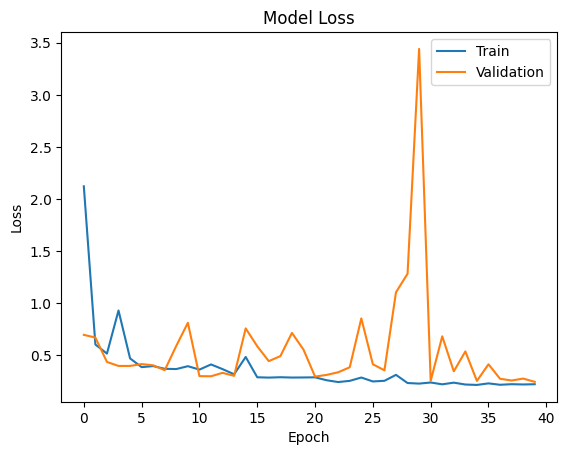

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

# Set the title and label the axes.
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Add legend to differentiate between lines
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

Evaluate the neural network model.

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

2540/2540 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step
1309/1309 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
# Loss and mean absolute error.
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print("Testing set Loss: {:5.2f}".format(loss))
print("Testing set Mean Abs Error: {:5.2f}".format(mae))

Testing set Loss:  0.25
Testing set Mean Abs Error:  0.08


In [ ]:
# The r2 score.
r2_test = metrics.r2_score(y_train, y_pred_train)
print("Training set r2 score: ",r2_test)

# Converts the predicted value to a category label
# (for example, 1 if the predicted value is greater than 0.5, 0 otherwise)
y_pred_train_classes = np.round(y_pred_train)

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_train, y_pred_train_classes)
print("Training set Accuracy: ",accuracy)

Training set r2 score:  0.965213418006897
Training set Accuracy:  0.981146239708579


In [ ]:
# The r2 score.
r2_test = metrics.r2_score(y_test, y_pred_test)
print("Testing set r2 score: ",r2_test)

# Converts the predicted value to a category label
# (for example, 1 if the predicted value is greater than 0.5, 0 otherwise)
y_pred_test_classes = np.round(y_pred_test)

# Calculate the accuracy.
accuracy = metrics.accuracy_score(y_test, y_pred_test_classes)
print("Testing set Accuracy: ",accuracy)

Testing set r2 score:  0.9583622813224792
Testing set Accuracy:  0.9798375537505972


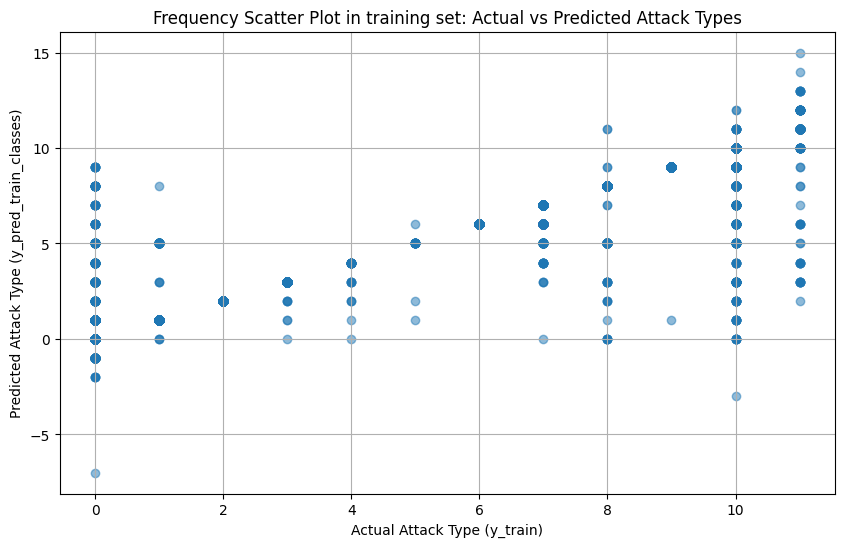

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_classes, alpha=0.5)

# Set the title and label the axes.
plt.xlabel("Actual Attack Type (y_train)")
plt.ylabel("Predicted Attack Type (y_pred_train_classes)")
plt.title("Frequency Scatter Plot in training set: Actual vs Predicted Attack Types")
plt.grid(True)

plt.show()

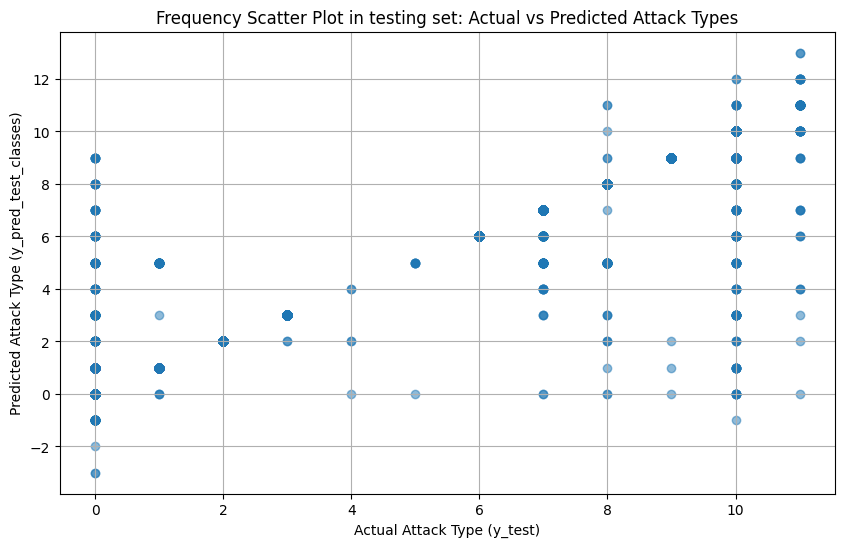

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test_classes, alpha=0.5)

# Set the title and label the axes.
plt.xlabel("Actual Attack Type (y_test)")
plt.ylabel("Predicted Attack Type (y_pred_test_classes)")
plt.title("Frequency Scatter Plot in testing set: Actual vs Predicted Attack Types")
plt.grid(True)

plt.show()

Save and reload the pretrained model.

In [ ]:
model.save("FNN_model.h5")

In [ ]:
model = tf.keras.models.load_model("FNN_model.h5", custom_objects={'initialize_weights': initialize_weights})